In [1]:
import IP
from IP import imread, imresize, randn, dtfuv, np, imshow, rgb2gray, plt, fft2, ifft2, fftshift
import scipy

In [2]:
# general function for adding blur and noise to our default image

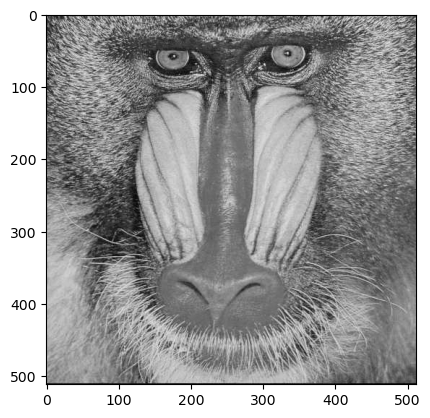

In [3]:
I = rgb2gray(imread("baboon.jpg"))
plt.figure()
imshow(I, aspect="equal", cmap="gray")

In [4]:
# Gaussian lowpass filter
def GLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filter=IP.np.exp(-D**2/(2*(D0**2)))
    If = fft2(I)
    filterf = fft2(filter)
    Ic = If * filterf
    return ifft2(Ic)

In [5]:
# Uniform noise filter
def uniform_noise(I, alpha=10):
    noise = randn(I.shape[0], I.shape[1])
    return noise*((alpha/100))+I

In [6]:
# check noise distribution is Gaussian and normalized
noise = randn(I.shape[0], I.shape[1])
# ploting = plt.hist(noise.flatten(), bins=500)
print(np.std(noise))

0.9996575455744959


Text(0.5, 1.0, 'Gaussian blur w/ noise')

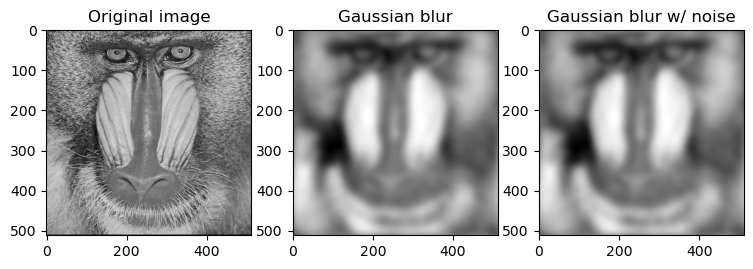

In [7]:
# Generate "broken" image
Ia = GLPF(I, 10) # blurred image
Ib = uniform_noise(Ia, 20) # blurred noisy image
plt.figure(figsize=(9,3))
IP.subplot(1,3,1);imshow(I, aspect="equal", cmap="gray"); plt.title('Original image')
IP.subplot(1,3,2);imshow(np.abs(Ia), aspect="equal", cmap="gray"); plt.title('Gaussian blur')
IP.subplot(1,3,3);imshow(np.abs(Ib), aspect="equal", cmap="gray"); plt.title('Gaussian blur w/ noise')

In [8]:
# "inverse" Gaussian lowpass filter for deblurring
def iGLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filter=IP.np.exp(-D**2/(2*(D0**2)))
    If = fft2(I)
    filterf = fft2(filter)
    epsilon = 1e-10
    deblurred = If / (filterf+epsilon)
    return ifft2(deblurred)

In [9]:
# # adjusted iGLPF to take into account noisiness (to an extent)
# def iGLPF(I, D0):
#     U,V=dtfuv(I.shape[0],I.shape[1])
#     D = IP.np.sqrt(U**2+V**2)
#     filter=IP.np.exp(-D**2/(2*(D0**2)))
#     mask=1/(1+(D/D0)**(2))
#     If = fft2(I)
#     filterf = fft2(filter)
#     maskf = fft2(mask)
#     denoise = If * maskf
#     epsilon = 1e-10
#     deblurred = denoise / (filterf+epsilon)
#     return ifft2(deblurred)

Text(0.5, 1.0, 'Deblur of Gaussian w/ noise')

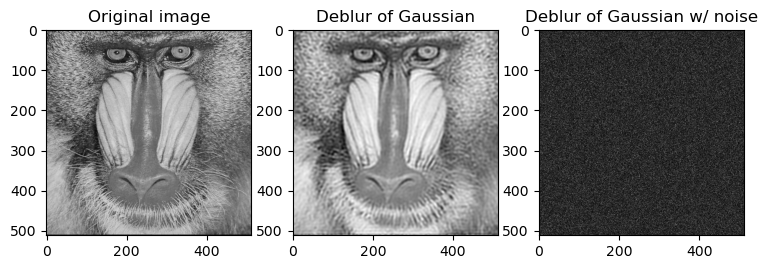

In [10]:
deblur_a = iGLPF(Ia, 10) # only blur
deblur_b = iGLPF(Ib, 10) # blur and random uniform noise
plt.figure(figsize=(9,3))
IP.subplot(1,3,1);imshow(np.abs(I), aspect="equal", cmap="gray"); plt.title('Original image')
IP.subplot(1,3,2);imshow(np.abs(deblur_a), aspect="equal", cmap="gray"); plt.title('Deblur of Gaussian')
IP.subplot(1,3,3);imshow(np.abs(deblur_b), aspect="equal", cmap="gray"); plt.title('Deblur of Gaussian w/ noise')

In [11]:
# a bunch of code used to loop through different blur values to see how output changes

In [ ]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    title = f'Known Image Deconvolution w/ {1+i} size Gaussian blur'
    plt.imshow(np.abs(Ibd), aspect="equal", cmap="gray")
    plt.title(title)
    filename = f'./test3/baboon_{1+i}.png'
    plt.savefig(filename)

In [ ]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    Ibdf = np.abs(fftshift(fft2(Ibd)))
    title = f'Known Image Deconvolution w/ {1+i} size Gaussian blur Power Spectrum'
    plt.imshow(np.log10(1+Ibdf), aspect="equal", cmap="gray")
    plt.title(title)
    filename = f'./test3FT/baboonFT_{1+i}.png'
    plt.savefig(filename)

In [ ]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    Ibdf = np.abs(fftshift(fft2(Ib)))
    title = f'{1+i} size Gaussian blur Power Spectrum'
    plt.imshow(np.log10(1+Ibdf), aspect="equal", cmap="gray")
    plt.title(title)
    filename = f'./test3blurFT/baboonFT_{1+i}.png'
    plt.savefig(filename)

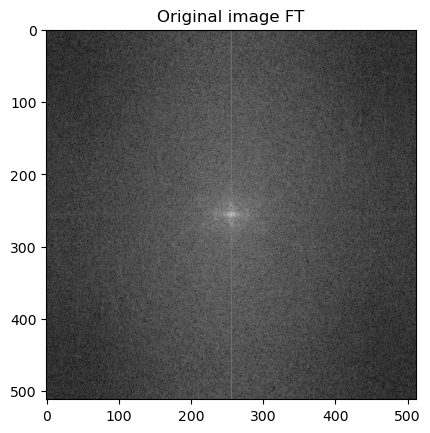

In [12]:
If = np.abs(fftshift(fft2(I)))
plt.imshow(np.log10(1+If), aspect="equal", cmap="gray")
plt.title("Original image FT")
filename = f'./baboonFT.png'
plt.savefig(filename)

In [ ]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    Ibf = np.abs(fftshift(fft2(Ib)))
    Ibdf = np.abs(fftshift(fft2(Ibd)))
    title1 = f'{1+i} size Gaussian blur Power Spectrum'
    title2 = f'Known Image Deconvolution w/ {1+i} size Gaussian blur Power Spectrum'
    title3 = f'Known Image Deconvolution w/ {1+i} size Gaussian blur'
    plt.figure(figsize=(27,9))
    IP.subplot(1,3,1);imshow(np.log10(1+Ibf), aspect="equal", cmap="gray"); plt.title(title1)
    IP.subplot(1,3,2);imshow(np.log10(1+Ibdf), aspect="equal", cmap="gray"); plt.title(title2)
    IP.subplot(1,3,3);imshow(np.abs(Ibd), aspect="equal", cmap="gray"); plt.title(title3)
    filename = f'./test4/baboon_{1+i}.png'
    plt.savefig(filename)
    plt.close()

In [ ]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    title1 = f'{1+i} size Gaussian blur'
    title2 = f'Known Image Deconvolution w/ {1+i} size Gaussian blur'
    plt.figure(figsize=(10,5))
    IP.subplot(1,2,1);imshow(np.abs(Ib), aspect="equal", cmap="gray"); plt.title(title1)
    IP.subplot(1,2,2);imshow(np.abs(Ibd), aspect="equal", cmap="gray"); plt.title(title2)
    filename = f'./test5/baboon_{1+i}.png'
    plt.savefig(filename)
    plt.close()

In [14]:
# SNR based adding noise

994.8704750864015


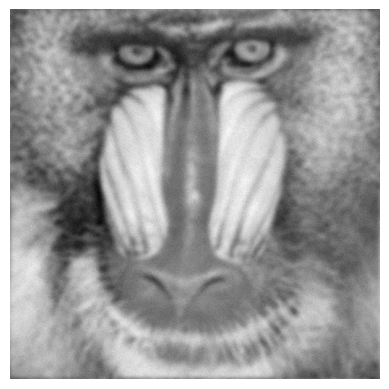

In [16]:
# calculate current SNR
noise = randn(I.shape[0], I.shape[1])
alpha = 3.27 #for 30dB of noise
Ib = np.abs(GLPF(I, 3))
In = noise*(Ib.mean()*(alpha/100))+Ib
SNR = np.sum((In)**2)/np.sum((noise*(Ib.mean()*(alpha/100)))**2)
print(SNR) # value should be close to 1000
fig, ax = plt.subplots()
ax.imshow(In, aspect="equal", cmap="gray")
ax.axis('off')
# export blurred noisy image we will use for blind image deblurring
plt.savefig("./blurred_noisy_baboon.png", bbox_inches='tight', pad_inches=0)